# Q4 Recommendation and Business Analysis

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain

from mlxtend.frequent_patterns import apriori, association_rules

## 1. Data Load 

In [188]:
file_path = 'Data_Q4/retail.csv'
data = pd.read_csv(file_path)

In [189]:
data

,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009/12/1 7:45,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009/12/1 7:45,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009/12/1 7:45,1.25,13085.0
...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data Preprocessing

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Transaction_id  1000000 non-null  object 
 1   Product_id      1000000 non-null  object 
 2   Description     995669 non-null   object 
 3   Quantity        1000000 non-null  float64
 4   Date            1000000 non-null  object 
 5   Price           1000000 non-null  float64
 6   Customer ID     774502 non-null   float64
dtypes: float64(3), object(4)
memory usage: 56.0+ MB


In [191]:
# Handle non-finite values in 'Quantity' column before conversion
non_finite_values = ~data['Quantity'].apply(np.isfinite)
data.loc[non_finite_values, 'Quantity'] = np.nan  # Convert non-finite values to NaN

# Convert 'Quantity' column to integer type after handling non-finite values
data['Quantity'] = data['Quantity'].astype('Int64')

# Fill missing values in 'Description' column with 'Unknown'
data['Description'].fillna('Unknown', inplace=True)

# Fill missing values in 'Customer ID' column using forward fill method
data['Customer ID'].fillna(method='ffill', inplace=True)

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

In [192]:
# Remove duplicate records
data.drop_duplicates(inplace=True)

# Check and Remove outliers
data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]

In [193]:
# Display information about the cleaned data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942779 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction_id  942779 non-null  object        
 1   Product_id      942779 non-null  object        
 2   Description     942779 non-null  object        
 3   Quantity        942779 non-null  Int64         
 4   Date            942779 non-null  datetime64[ns]
 5   Price           942779 non-null  float64       
 6   Customer ID     942779 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), object(3)
memory usage: 58.4+ MB


## 3. EDA

### (1) EDA to Get Basic Information

Date Range: 715 days 07:38:00


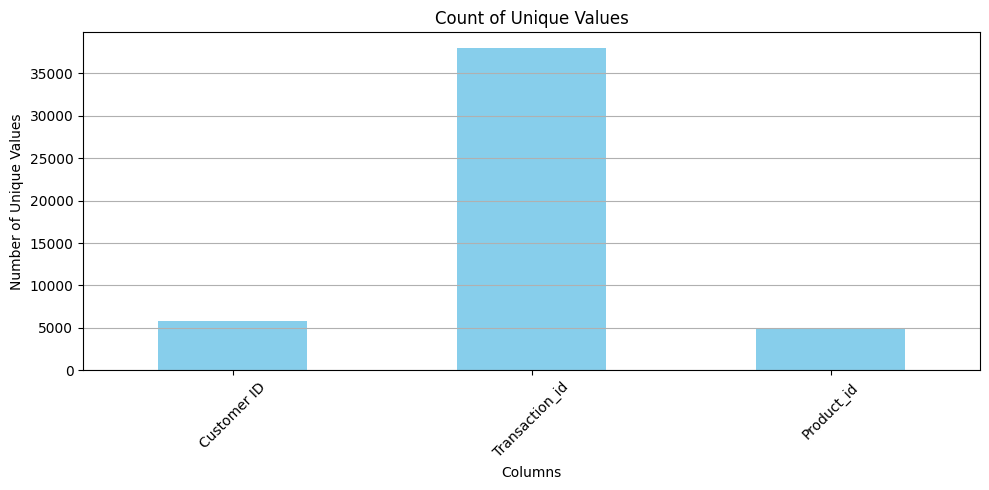

In [194]:
# Visualizing Date range
min_date = data['Date'].min()
max_date = data['Date'].max()
date_range = max_date - min_date

print(f"Date Range: {date_range}")

# Count unique values in Customer ID, Transaction_id, and Product_id
unique_counts = data[['Customer ID', 'Transaction_id', 'Product_id']].nunique()

# Plotting count of unique values
plt.figure(figsize=(10, 5))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Unique Values')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

We obtained the time span of the data and presented a bar chart showing the count of unique Customer IDs, Transaction IDs, and Product IDs. Printing out the date range in the data, these visualizations help us understand the fundamental characteristics and distribution of the data.

### (2) Sales Trend (Exploration about Time)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_33748\4245237356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['YearMonth'] = data['Date'].dt.to_period('M')  # Creating a new column with Year-Month format


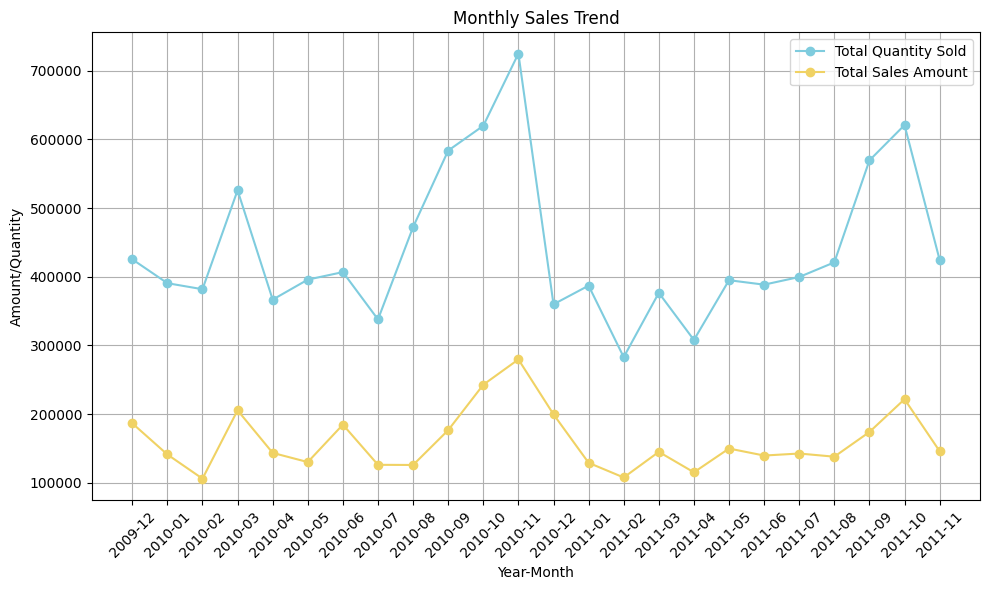

In [204]:
# Grouping sales by month
data['YearMonth'] = data['Date'].dt.to_period('M')  # Creating a new column with Year-Month format

# Grouping sales by month and converting 'YearMonth' to string format
monthly_sales = data.groupby('YearMonth').agg({'Quantity': 'sum', 'Price': 'sum'}).reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Plotting monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Quantity'], marker='o', label='Total Quantity Sold', color='#7fccde')
plt.plot(monthly_sales['YearMonth'], monthly_sales['Price'], marker='o', label='Total Sales Amount', color='#f0d264')

plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Amount/Quantity')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

**Insight 1:** Overall, late autumn to early winter marks a peak shopping period each year. Adequate restocking plans need to be established beforehand to prevent severe shortages. There's also a notable surge in demand between February and March annually, requiring proactive preparation.

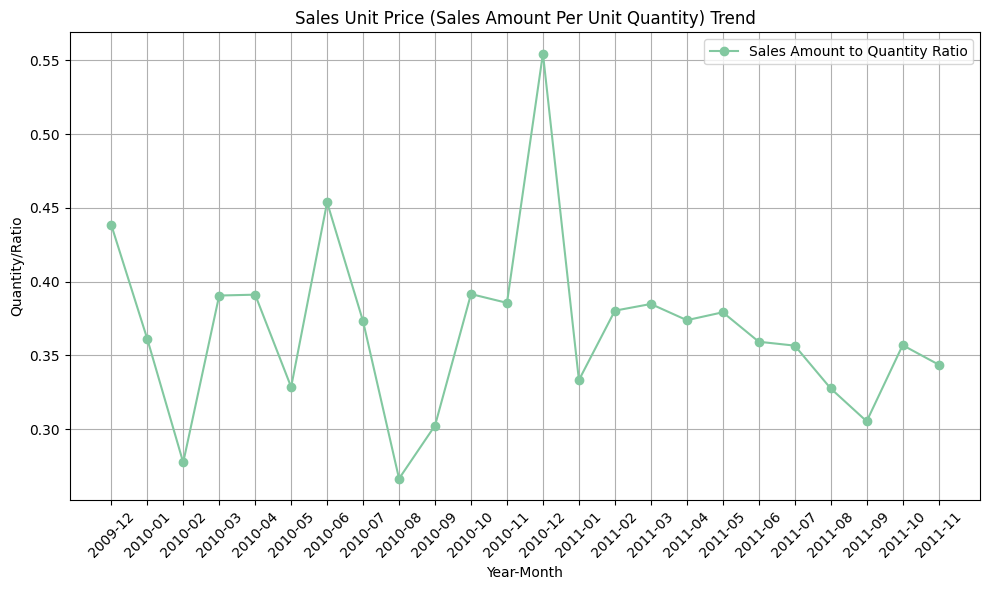

In [196]:
# Calculating sales unit price (sales amount per unit quantity)
monthly_sales['SalesQuantityRatio'] = monthly_sales['Price'] / monthly_sales['Quantity']

# Plotting sales quantity and sales amount ratio trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['SalesQuantityRatio'], marker='o', label='Sales Amount to Quantity Ratio', color='#82c8a0')

plt.title('Sales Unit Price (Sales Amount Per Unit Quantity) Trend')
plt.xlabel('Year-Month')
plt.ylabel('Quantity/Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

**Insight 2:** In June and December of 2010, there were notably high sales-to-volume ratios, indicating potential value in certain product sales strategies during these months.

### (3)  Exploration about Pricing Strategy and Stock Selection Strategy

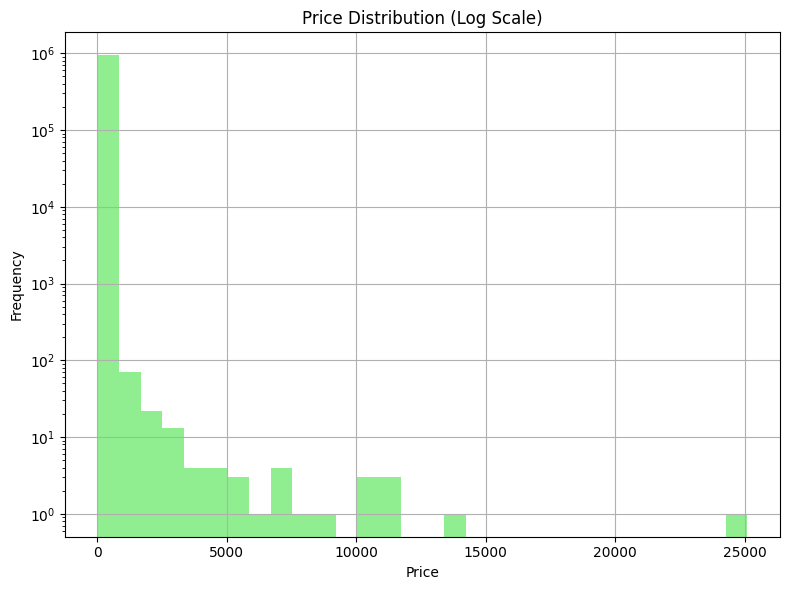

In [197]:
# Plotting Price distribution in log scale
plt.figure(figsize=(8, 6))
plt.hist(data['Price'], bins=30, color='lightgreen')
plt.title('Price Distribution (Log Scale)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yscale('log')  # Setting y-axis to logarithmic scale
plt.grid(True)
plt.tight_layout()

plt.show()

**Insight 3:** In June and December of 2010, there were notably high sales-to-volume ratios, suggesting that there might be valuable sales strategies for certain products during these two months.

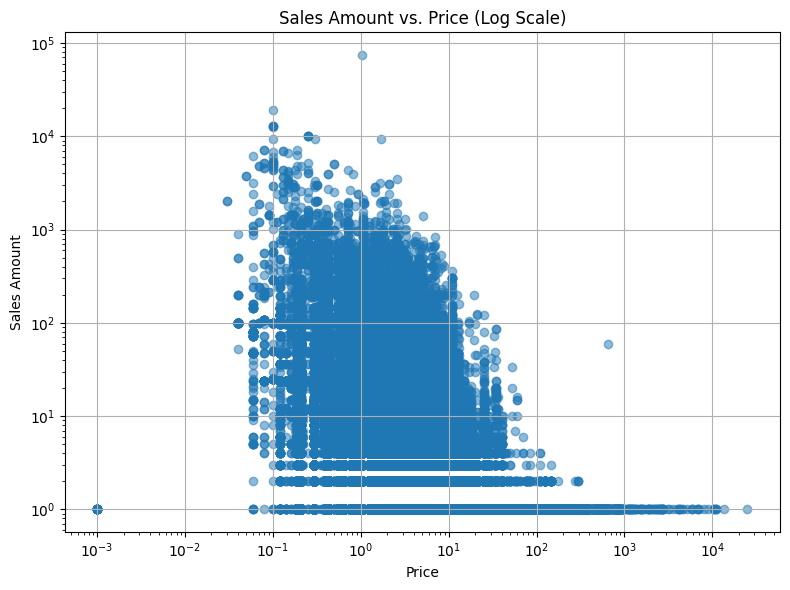

In [198]:
# Plotting sales amount vs. price scatter plot with logarithmic scale
plt.figure(figsize=(8, 6))
plt.scatter(data['Price'], data['Quantity'], alpha=0.5)

plt.title('Sales Amount vs. Price (Log Scale)')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.xscale('log')  # Setting logarithmic scale for the x-axis
plt.yscale('log')  # Setting logarithmic scale for the y-axis
plt.grid(True)
plt.tight_layout()

plt.show()

**Insight 4:** Given the need for exploration within a wide range of values, constructing a scatter plot using a logarithmic coordinate system can better illustrate the relationship between price and sales. Overall, we can observe that there are more products with lower prices and higher sales volumes, while there are fewer products with both high prices and high sales volumes. As the price increases, the quantity of products with high sales decreases.

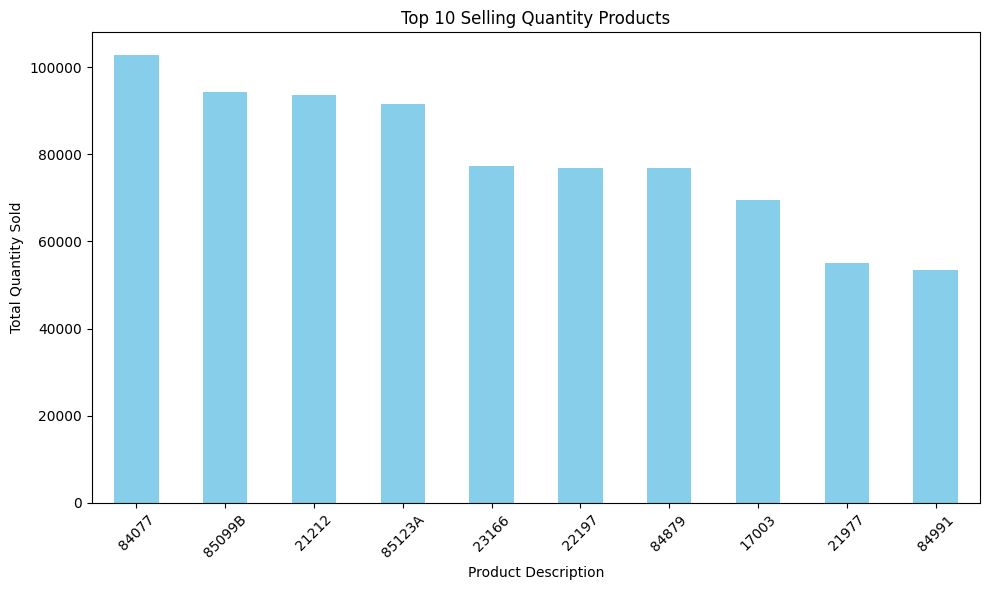

Product_id | Description | Price
17003 | BROCADE RING PURSE  | 0.21
21212 | PACK OF 72 RETRO SPOT CAKE CASES | 0.55
21977 | PACK OF 60 PINK PAISLEY CAKE CASES | 0.55
22197 | POPCORN HOLDER , SMALL  | 0.85
23166 | MEDIUM CERAMIC TOP STORAGE JAR | 1.04
84077 | WORLD WAR 2 GLIDERS ASSTD DESIGNS | 0.21
84879 | ASSORTED COLOUR BIRD ORNAMENT | 1.69
84991 | 60 TEATIME FAIRY CAKE CASES | 0.55
85099B | JUMBO BAG RED WHITE SPOTTY  | 1.95
85123A | WHITE HANGING HEART T-LIGHT HOLDER | 2.95


In [199]:
# Grouping sales by product and summing up the quantities sold for each product
product_sales = data.groupby('Product_id')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting bar chart for top 10 selling products
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Selling Quantity Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Displaying descriptions of top 10 selling products
Quantity_top_products = product_sales.index.tolist()


product_info = data[data['Product_id'].isin(Quantity_top_products)].groupby('Product_id').agg({
    'Description': 'first',  # Selecting the first description (assuming it's consistent for each product)
    'Price': 'first'  # Selecting the first price (assuming it's consistent for each product)
}).reset_index()

# Displaying Product_id, Description, and Price
print("Product_id | Description | Price")
for index, row in product_info.iterrows():
    print(f"{row['Product_id']} | {row['Description']} | {row['Price']}")

**Insight 5:** Upon analyzing the top ten best-selling products, it's evident that most of these items are compact, affordable, decorative, or intended for everyday use. They are suitable as gifts, decorations, or for daily use. It would be advisable to maintain or even increase their stock quantities.

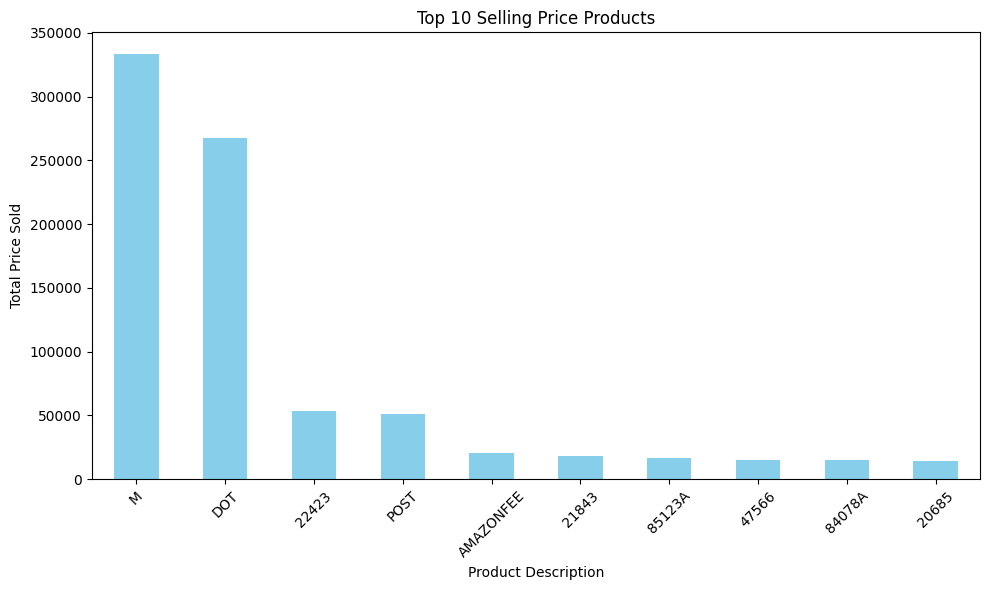

Product_id | Description | Price
20685 | RED SPOTTY COIR DOORMAT | 6.75
21843 | RETRO SPOT CAKE STAND | 21.7
22423 | REGENCY CAKESTAND 3 TIER | 12.75
47566 | PARTY BUNTING | 4.65
84078A | SET/4 WHITE RETRO STORAGE CUBES  | 34.95
85123A | WHITE HANGING HEART T-LIGHT HOLDER | 2.95
AMAZONFEE | AMAZON FEE | 6706.71
DOT | DOTCOM POSTAGE | 647.19
M | Manual | 4.0
POST | POSTAGE | 18.0


In [200]:
# Grouping sales by product and summing up the quantities sold for each product
product_sales = data.groupby('Product_id')['Price'].sum().sort_values(ascending=False).head(10)

# Plotting bar chart for top 10 selling products
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Selling Price Products')
plt.xlabel('Product Description')
plt.ylabel('Total Price Sold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Displaying descriptions of top 10 selling products
Price_top_products = product_sales.index.tolist()


product_info = data[data['Product_id'].isin(Price_top_products)].groupby('Product_id').agg({
    'Description': 'first',  # Selecting the first description (assuming it's consistent for each product)
    'Price': 'first'  # Selecting the first price (assuming it's consistent for each product)
}).reset_index()

# Displaying Product_id, Description, and Price
print("Product_id | Description | Price")
for index, row in product_info.iterrows():
    print(f"{row['Product_id']} | {row['Description']} | {row['Price']}")

**Insight 6:** After analyzing the top ten highest revenue-generating products in contrast with the top ten best-selling products, it was observed that only the product with ID 85123A (WHITE HANGING HEART T-LIGHT HOLDER) is both the highest in sales volume and revenue. Other items, to a greater or lesser extent, achieve higher revenue due to their uniqueness or higher unit price. They can be categorized into three main types:

    1. Special Fees: AMAZON FEE, DOTCOM POSTAGE, POSTAGE
    2. Special Items: Manual
    3. Items Similar to the Highest Selling Products: Compact, affordable, decorative, or intended for everyday use

**This further underscores the commercial value of small, affordable, decorative, or utilitarian items."**


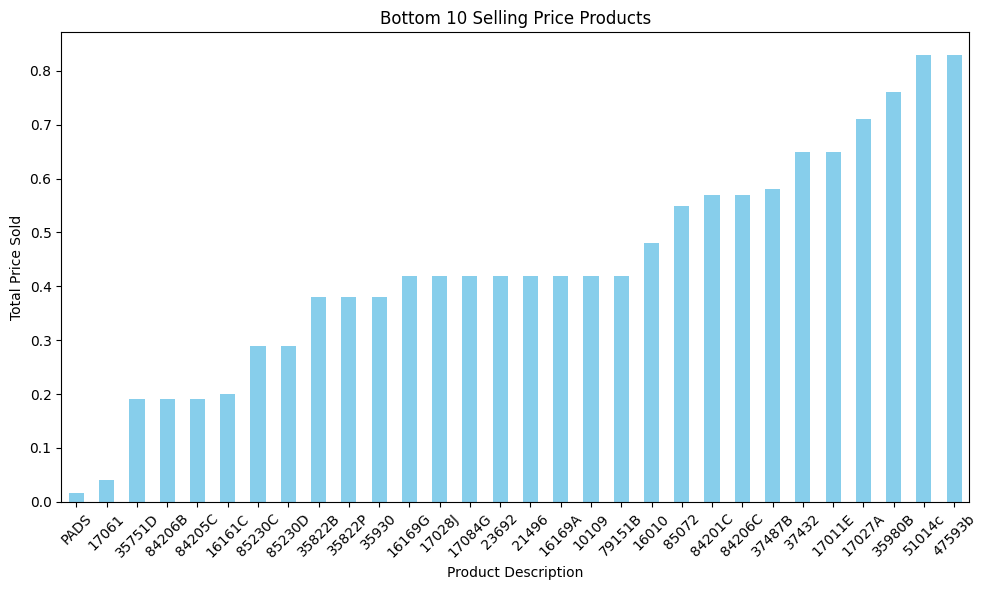

Product_id | Description | Price
10109 | BENDY COLOUR PENCILS | 0.42
16010 | FOLDING CAMPING SCISSOR W/KNIF & S | 0.12
16161C | WRAP SPEED DEMONS  | 0.1
16169A | WRAP CHRISTMAS DECOUPAGE | 0.42
16169G | WRAP ROMANTIC DECOUPAGE | 0.42
17011E | ORIGAMI OPIUM SCENT INCENSE+FLOWER | 0.65
17027A | INCENSE BAZAAR CANNABIS | 0.42
17028J | INCENSE BAZAAR PEACH | 0.42
17061 | ASSORTED SHAPED STENCIL FOR HENNA | 0.04
17084G | MOON INCENSE | 0.21
21496 | WOODLAND CREATURES  WRAP | 0.42
23692 | WRAP A PRETTY THANK YOU | 0.42
35751D | PINK CURRENT CANDLE RING | 0.19
35822B | ACRYLIC BEAD CHAIN, BLUE | 0.38
35822P | ACRYLIC BEAD CHAIN, PINK | 0.38
35930 | PINK HEART CHRISTMAS DECORATION | 0.38
35980B | RED TOP SCANDINAVIAN HEART  | 0.38
37432 | MUG PINK AND PURPLE ARABIC DESIGN | 0.65
37487B | YELLOW/ORANGE FLOWER DESIGN PLATE | 0.29
47593b | SCOTTIE DOGS BABY BIB | 0.83
51014c | FEATHER PEN,COAL BLACK | 0.83
79151B | SILICON CUBE 25W, BLUE | 0.42
84201C | HAPPY BIRTHDAY CARD TEDDY/CAKE | 0.19
84205

In [205]:
# Grouping sales by product and summing up the quantities sold for each product
product_sales = data.groupby('Product_id')['Price'].sum().sort_values().head(30)

# Plotting bar chart for top 10 selling products
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Bottom 10 Selling Price Products')
plt.xlabel('Product Description')
plt.ylabel('Total Price Sold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Displaying descriptions of top 10 selling products
Price_bottom_products = product_sales.index.tolist()


product_info = data[data['Product_id'].isin(Price_bottom_products)].groupby('Product_id').agg({
    'Description': 'first',  # Selecting the first description (assuming it's consistent for each product)
    'Price': 'first'  # Selecting the first price (assuming it's consistent for each product)
}).reset_index()

# Displaying Product_id, Description, and Price
print("Product_id | Description | Price")
for index, row in product_info.iterrows():
    print(f"{row['Product_id']} | {row['Description']} | {row['Price']}")

**Insight 7:** The ten lowest revenue-generating products were analyzed, and as expected, these items have relatively low unit prices and very low sales volume. They yield limited profits and can be reasonably concluded as non-essential items, providing low returns. Therefore, it might be advisable to consider reducing their purchase quantities.

### (4) Exploration about the Customers

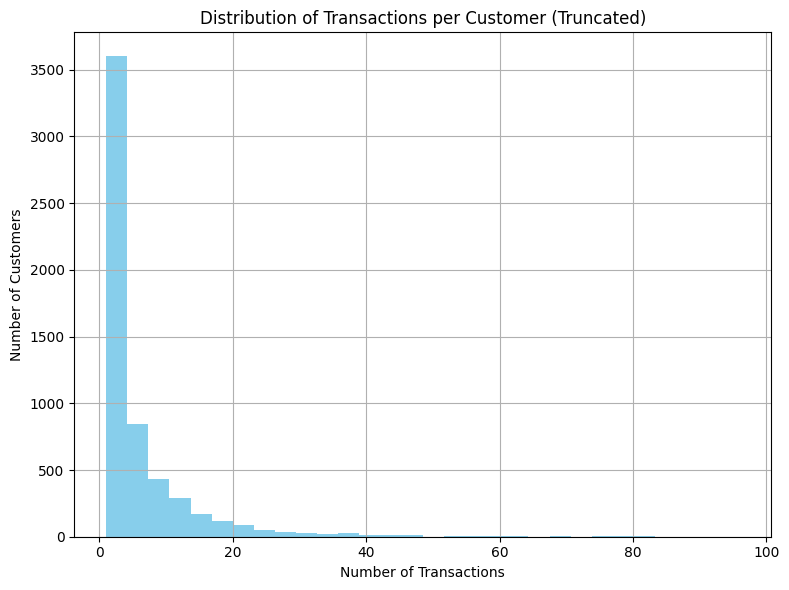

In [70]:
# Selecting transactions per customer less than a threshold (e.g., 100)
threshold = 100
truncated_transactions = transactions_per_customer[transactions_per_customer < threshold]

# Plotting histogram for truncated transactions per customer
plt.figure(figsize=(8, 6))
plt.hist(truncated_transactions, bins=30, color='skyblue')
plt.title('Distribution of Transactions per Customer (Truncated)')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()

plt.show()


**Insight 8:** The analysis of customer transaction volume revealed a pronounced long-tail effect. This phenomenon indicates that only a small portion of customers engage in a large number of transactions, while the majority have relatively few transactions. To address this, we truncated the data, focusing solely on the transaction behavior of the majority of customers. Users with transactions exceeding 20 were considered loyal customers. Analyzing their extensive transaction characteristics enabled personalized recommendations tailored to their preferences.

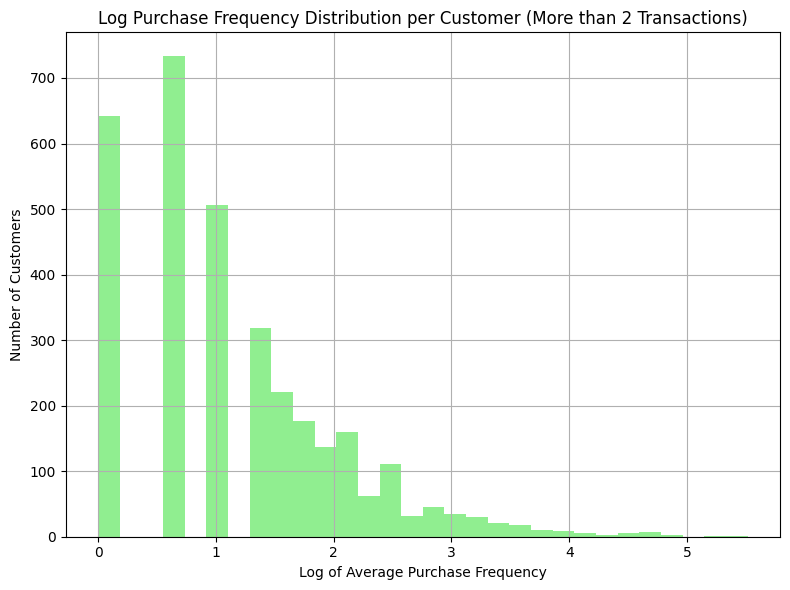

In [71]:
# Counting the number of transactions per customer
transactions_per_customer = data.groupby('Customer ID')['Transaction_id'].nunique()

# Filter customers with more than two transactions
multiple_transactions_customers = transactions_per_customer[transactions_per_customer > 2].index

# Calculate purchase frequency per customer for customers with more than two transactions
purchase_frequency = data[data['Customer ID'].isin(multiple_transactions_customers)].groupby('Customer ID')['Date'].agg(lambda x: x.diff().mean())
purchase_frequency = purchase_frequency.dropna().dt.days  # Assuming the difference is calculated in days

# Taking log of purchase frequency
log_purchase_frequency = np.log1p(purchase_frequency)

# Plotting histogram for log of purchase frequency
plt.figure(figsize=(8, 6))
plt.hist(log_purchase_frequency, bins=30, color='lightgreen')
plt.title('Log Purchase Frequency Distribution per Customer (More than 2 Transactions)')
plt.xlabel('Log of Average Purchase Frequency (Transaction interval)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()

plt.show()


**Insight 9:** By calculating the average transaction interval between purchase dates for each customer (in days), we estimated their purchasing frequency. To mitigate the impact of the long-tail effect on visualization, we utilized logarithmic scaling. Our analysis indicates that customers with multiple transaction records may predominantly consist of loyal customers due to their lower purchase intervals and higher frequency.

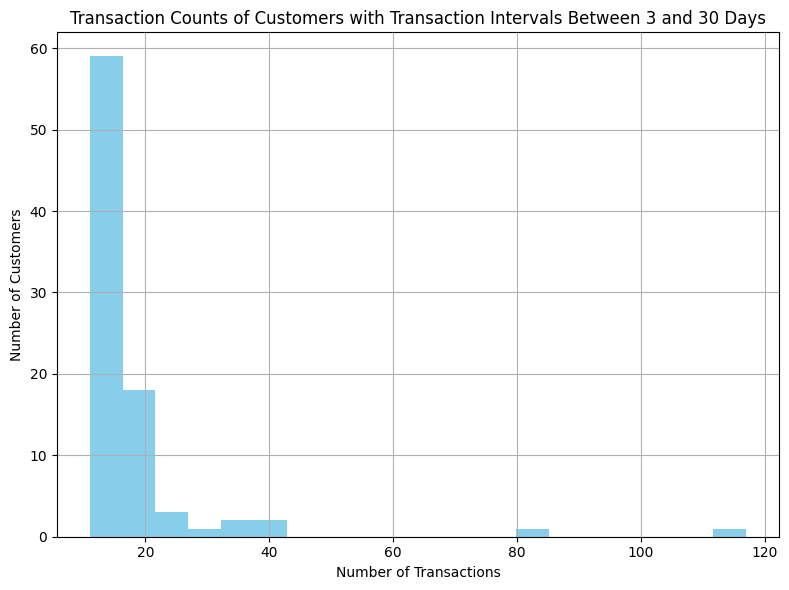

In [101]:
# Filtering customers with transaction intervals between 3 and 30 days
interval_3_to_30_customers = purchase_frequency[(purchase_frequency >= 3) & (purchase_frequency < 30)].index

# Filtering data for customers with transaction intervals between 3 and 30 days
interval_3_to_30_transactions = data[data['Customer ID'].isin(interval_3_to_30_customers)]

# Counting transactions for customers with transaction intervals between 3 and 30 days
transaction_counts_interval_3_to_30 = interval_3_to_30_transactions.groupby('Customer ID')['Transaction_id'].nunique()

# Plotting histogram for transaction counts of customers with transaction intervals between 3 and 30 days
plt.figure(figsize=(8, 6))
plt.hist(transaction_counts_interval_3_to_30, bins=20, color='skyblue')
plt.title('Transaction Counts of Customers with Transaction Intervals Between 3 and 30 Days')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()

plt.show()


**Insight 10:** However, upon further analysis of the specific transaction amounts for users with transaction intervals between 3 and 30, it appears that their transaction counts are not particularly high. Hence, it's essential to consider transaction amounts in conjunction with these findings.

Core customers' ID: [12422.0, 12483.0, 12500.0, 12594.0, 12599.0, 12600.0, 12676.0, 12726.0, 12755.0, 12826.0, 12853.0, 12910.0, 13305.0, 13313.0, 13450.0, 13481.0, 13485.0, 13520.0, 13538.0, 13577.0, 13662.0, 13728.0, 13782.0, 13831.0, 13854.0, 14032.0, 14047.0, 14113.0, 14191.0, 14217.0, 14404.0, 14466.0, 14560.0, 14607.0, 14621.0, 14626.0, 14676.0, 14715.0, 14744.0, 14867.0, 15079.0, 15182.0, 15241.0, 15288.0, 15373.0, 15434.0, 15606.0, 15660.0, 15712.0, 15785.0, 15812.0, 15838.0, 15845.0, 15953.0, 16013.0, 16094.0, 16103.0, 16218.0, 16293.0, 16434.0, 16742.0, 16748.0, 16817.0, 16841.0, 16912.0, 16954.0, 16985.0, 16986.0, 17044.0, 17157.0, 17188.0, 17236.0, 17351.0, 17368.0, 17381.0, 17470.0, 17512.0, 17552.0, 17676.0, 17739.0, 17848.0, 17873.0, 17905.0, 17949.0, 18087.0, 18094.0, 18241.0]


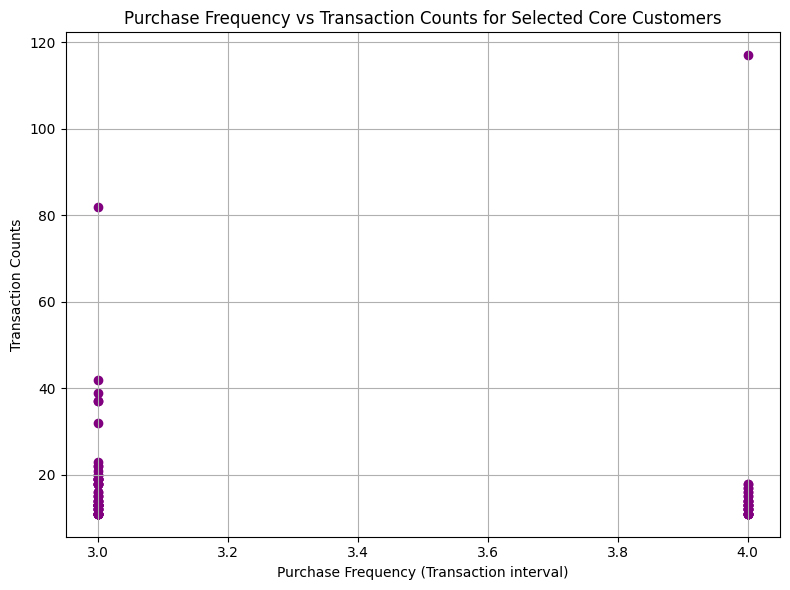

In [206]:
# Filtering customers with transaction intervals between 3 and 30 days
interval_3_to_30_customers = purchase_frequency[(purchase_frequency >= 3) & (purchase_frequency < 30)].index

# Filtering data for customers with transaction intervals between 3 and 30 days
interval_3_to_30_transactions = data[data['Customer ID'].isin(interval_3_to_30_customers)]

# Counting transactions for customers with transaction intervals between 3 and 30 days
transaction_counts_interval_3_to_30 = interval_3_to_30_transactions.groupby('Customer ID')['Transaction_id'].nunique()

# Filtering customers with more than 10 transactions
customers_10_plus_transactions = transaction_counts_interval_3_to_30[transaction_counts_interval_3_to_30 > 10].index

# Outputting the Customer IDs
print(f"Core customers' ID: {list(customers_10_plus_transactions)}")

purchase_frequency_selected_customers = purchase_frequency.loc[customers_10_plus_transactions]
transaction_counts_selected_customers = transaction_counts_interval_3_to_30.loc[customers_10_plus_transactions]

plt.figure(figsize=(8, 6))
plt.scatter(purchase_frequency_selected_customers, transaction_counts_selected_customers, color='purple')
plt.title('Purchase Frequency vs Transaction Counts for Selected Core Customers')
plt.xlabel('Purchase Frequency (Transaction interval)')
plt.ylabel('Transaction Counts')
plt.grid(True)
plt.tight_layout()

plt.show()


**Insight 11:** I further identified users with transaction counts exceeding 10 and transaction intervals between 5 to 30 days, considering them as core users. Observing their transaction behavior affirmed this as a reasonable conclusion.

## 4. Association Rule Analysis

In [184]:
# Extract Transaction_id and Product_id, then organize the product list by Transaction_id
transactions = data.groupby('Transaction_id')['Product_id'].apply(list).reset_index()

# Create basket data suitable for association rule analysis
basket = transactions['Product_id'].str.join('|').str.get_dummies('|')

# Build a dictionary for Product_id and Description
product_desc_dict = data[['Product_id', 'Description']].drop_duplicates().set_index('Product_id')['Description'].to_dict()

In [120]:
basket

,10002,10002R,10080,10109,10120,10123C,10123G,10124A,10124G,10125,...,TEST001,TEST002,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,gift_0001_70,gift_0001_80,m
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
# Using FP-Growth algorithm to mine frequent itemsets
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)

# Generating association rules based on frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

D:\Anaconda\envs\python3.8_torch2.1\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [161]:
# Merging 'antecedents' and 'consequents', then removing duplicates
rules['combined'] = rules.apply(lambda x: frozenset(chain(x['antecedents'], x['consequents'])), axis=1)
rules.drop_duplicates(subset='combined', keep='first', inplace=True)

# Sorting by the 'lift' column
rules = rules.sort_values(by='lift', ascending=False)

In [166]:
# Sorting by the 'lift' column and selecting the top 100 rules
rules = rules.head(100).copy()

# Storing the retained rules
filtered_rules = []

# For each rule
for idx, row in rules.iterrows():
    combined_set = row['combined']
    keep_rule = True
    
    # Checking inclusion in other rules
    for other_idx, other_row in rules.iterrows():
        other_combined_set = other_row['combined']
        if combined_set.issubset(other_combined_set) and combined_set != other_combined_set:
            if row['lift'] < other_row['lift']:
                keep_rule = False
                break
                
    # Retaining if no inclusion or higher lift
    if keep_rule:
        filtered_rules.append(row)
        
# Converting to DataFrame format
filtered_rules_df = pd.DataFrame(filtered_rules)

# Outputting the top 10 rules
top_ten_filtered_rules = filtered_rules_df.head(10).copy()


In [167]:
top_ten_filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined
1742,"(22746, 22748)",(22745),0.011689,0.017282,0.010158,0.869074,50.286906,0.009956,7.505930,0.991706,"(22746, 22748, 22745)"
1640,(22578),(22579),0.016306,0.013272,0.010369,0.635922,47.915420,0.010153,2.710214,0.995360,"(22578, 22579)"
618,(22301),(22300),0.016201,0.013351,0.010079,0.622150,46.599761,0.009863,2.611218,0.994655,"(22300, 22301)"
36,(84596B),(84596F),0.017573,0.014697,0.011108,0.632132,43.012222,0.010850,2.678417,0.994222,"(84596B, 84596F)"
1638,(22577),(22578),0.018259,0.016306,0.011609,0.635838,38.993958,0.011312,2.701255,0.992476,"(22577, 22578)"
1204,(21901),(21899),0.017124,0.015488,0.010000,0.583975,37.704711,0.009735,2.366475,0.990438,"(21899, 21901)"
822,(21122),(21124),0.020712,0.016227,0.012612,0.608917,37.525141,0.012276,2.515511,0.993938,"(21122, 21124)"
1770,(23300),(23301),0.015910,0.019208,0.011451,0.719735,37.469703,0.011146,3.499511,0.989048,"(23300, 23301)"
1206,(21900),(21899),0.020792,0.015488,0.011530,0.554569,35.806043,0.011208,2.210243,0.992712,"(21900, 21899)"
786,(21239),(21240),0.019156,0.019842,0.013509,0.705234,35.543051,0.013129,3.325210,0.990845,"(21239, 21240)"


In [168]:
# Converting Product IDs in antecedents and consequents columns to Description
top_ten_filtered_rules['antecedents_description'] = rules['antecedents'].apply(lambda x: [product_desc_dict[p] for p in x])
top_ten_filtered_rules['consequents_description'] = rules['consequents'].apply(lambda x: [product_desc_dict[p] for p in x])

# Outputting the transformed rules
top_ten_filtered_rules[['antecedents_description', 'consequents_description', 'support', 'confidence', 'lift']]

,antecedents_description,consequents_description,support,confidence,lift
1742,"[POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",[POPPY'S PLAYHOUSE BEDROOM ],0.010158,0.869074,50.286906
1640,[WOODEN STAR CHRISTMAS SCANDISPOT],[WOODEN TREE CHRISTMAS SCANDISPOT],0.010369,0.635922,47.915420
618,[COFFEE MUG CAT + BIRD DESIGN],[COFFEE MUG DOG + BALL DESIGN],0.010079,0.622150,46.599761
36,[SMALL DOLLY MIX DESIGN ORANGE BOWL],[SMALL MARSHMALLOWS PINK BOWL],0.011108,0.632132,43.012222
1638,[WOODEN HEART CHRISTMAS SCANDISPOT],[WOODEN STAR CHRISTMAS SCANDISPOT],0.011609,0.635838,38.993958
1204,"[KEY FOB , BACK DOOR ]",[GARAGE KEY FOB],0.010000,0.583975,37.704711
822,[SET/10 PINK POLKADOT PARTY CANDLES],[SET/10 BLUE POLKADOT PARTY CANDLES],0.012612,0.608917,37.525141
1770,[GARDENERS KNEELING PAD CUP OF TEA ],[GARDENERS KNEELING PAD KEEP CALM ],0.011451,0.719735,37.469703
1206,"[KEY FOB , SHED]",[GARAGE KEY FOB],0.011530,0.554569,35.806043
786,[PINK POLKADOT CUP],[BLUE POLKADOT CUP],0.013509,0.705234,35.543051


In [181]:
# Output the 10 useful recommendation
i = 0
for index, row in top_ten_filtered_rules.iterrows():
    antecedents_description_i = [word.lower() for word in row["antecedents_description"]]
    consequents_description_i = [word.lower() for word in row["consequents_description"]]
    i+=1
    print(f"Recommendation {i} by the Rule {index}: Recommend putting {antecedents_description_i} together with {consequents_description_i} or bundling them for sale\n")

Recommendation 1 by the Rule 1742: Recommend putting ["poppy's playhouse livingroom ", "poppy's playhouse kitchen"] together with ["poppy's playhouse bedroom "] or bundling them for sale

Recommendation 2 by the Rule 1640: Recommend putting ['wooden star christmas scandispot'] together with ['wooden tree christmas scandispot'] or bundling them for sale

Recommendation 3 by the Rule 618: Recommend putting ['coffee mug cat + bird design'] together with ['coffee mug dog + ball design'] or bundling them for sale

Recommendation 4 by the Rule 36: Recommend putting ['small dolly mix design orange bowl'] together with ['small marshmallows pink bowl'] or bundling them for sale

Recommendation 5 by the Rule 1638: Recommend putting ['wooden heart christmas scandispot'] together with ['wooden star christmas scandispot'] or bundling them for sale

Recommendation 6 by the Rule 1204: Recommend putting ['key fob , back door '] together with ['garage key fob'] or bundling them for sale

Recommendation